Now I'll use a few more of the built-in features of scikit-learn in place of my handrolled functions.

I'll also explore other linear models including gradient descent.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn
seaborn.set()

In [5]:
N=50

x=np.linspace(0,50,N)
y=-10 + 1.3*x - 0.01*x*x + 3*np.random.randn(N)
x=x.reshape(N,1)  

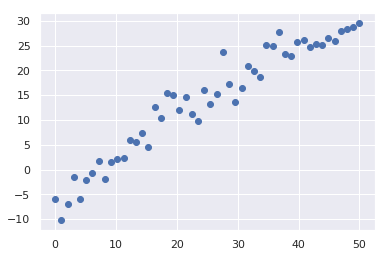

In [6]:
plt.scatter(x,y)

Now I re-do the approach from the previous notebook in a terser fashion using the `preprocessing` and `pipeline` modules.

In [15]:
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.pipeline import make_pipeline

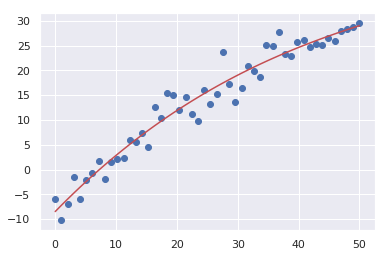

In [19]:
pipeline = make_pipeline(
    PolynomialFeatures(4), 
    StandardScaler(),
    linear_model.LinearRegression()
) 

pipeline.fit(x,y)
plt.scatter(x,y)
plt.plot(x,pipeline.predict(x),'r')

Which makes it much easier to explore model tweaks, e.g. changing the number of polynomial computed features.

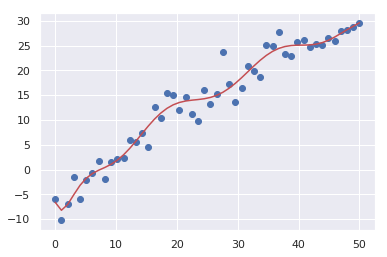

In [26]:
pipeline = make_pipeline(
    PolynomialFeatures(10),  #overfitting!
    StandardScaler(),
    linear_model.LinearRegression()
) 

pipeline.fit(x,y)
plt.scatter(x,y)
plt.plot(x,pipeline.predict(x),'r')

Or swapping in a different model, such as Ridge (L2) regularization:

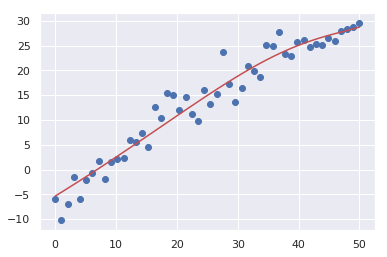

In [29]:
pipeline = make_pipeline(
    PolynomialFeatures(10), 
    StandardScaler(),
    linear_model.Ridge()
) 

pipeline.fit(x,y)
plt.scatter(x,y)
plt.plot(x,pipeline.predict(x),'r')




i.e. regularization reduces the amount of over-fitting.

## Gradient Descent

`scikit-learn` provides a stochastic gradient descent model:

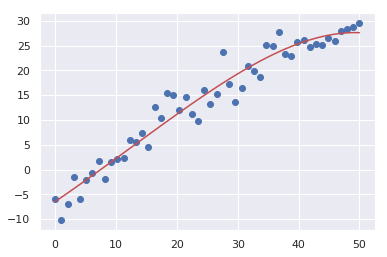

In [33]:
pipeline = make_pipeline(
    PolynomialFeatures(4), 
    StandardScaler(),
    linear_model.SGDRegressor(verbose=0,max_iter=1000)
) 
pipeline.fit(x,y)
plt.scatter(x,y)
plt.plot(x,pipeline.predict(x),'r')

Note: this failed *horribly* when I didn't include `StandardScalar`, which is a well known issue with gradient descent.  The higher-order polynomial terms 'drown out' the lower-order ones, and the gradient descent algorithm is left trying to navigate down a very long, thin valley, and so convergence will be very slow, and over-shooting is much more likely.

## Comparing models

How do the different model predictions compare with each other?

Let's create two pipelines.

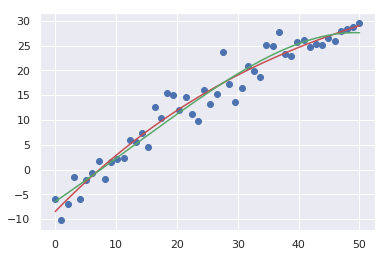

In [41]:
pipe1 = make_pipeline(
    PolynomialFeatures(4), 
    StandardScaler(),
    linear_model.LinearRegression()
) 
pipe1.fit(x,y)

pipe2 = make_pipeline(
    PolynomialFeatures(4), 
    StandardScaler(),
    linear_model.SGDRegressor(verbose=0,max_iter=1000)
) 
pipe2.fit(x,y)

plt.scatter(x,y)
plt.plot(x,pipe1.predict(x),'r')
plt.plot(x,pipe2.predict(x),'g')


I can also compare the loss:

In [42]:
pipe1.score(x,y)

0.9542511314208603

In [44]:
pipe2.score(x,y)

0.9498490924821953